In [3]:
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

###  1

    Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в еонкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

__Ответ__

Следующие наборы данных можно интерпретировать, как временные ряды: а, в, г, д

### 2 
Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [4]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [5]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [9]:
# проверим данные на пропуски
data["DUQ_MW"].isnull().sum()

0

пропусков не обнаружено

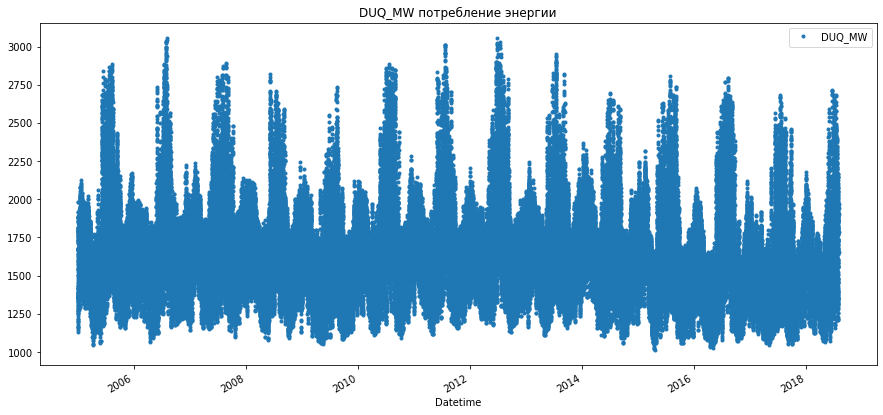

In [12]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW потребление энергии' )

**Описание датасета**
* пропусков в данных не обнаружено
* Визуальный анализ показывает что данные имеют циклы
* Явных выборосов не наблюдается

### 3 
Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [15]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [26]:
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [39]:
brent_week_std = brent_data.resample("W").std()
brent_week_std.head()

,Значение
Дата,
2010-09-05,0.185688
2010-09-12,0.649759
2010-09-19,0.539728
2010-09-26,0.596068
2010-10-03,2.408588


In [40]:
brent_month_std = brent_data.resample("M").std()
brent_month_std.head()

,Значение
Дата,
2010-09-30,1.294269
2010-10-31,0.898559
2010-11-30,1.753625
2010-12-31,1.443311
2011-01-31,1.842147


### 4
Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [70]:
brent_year_std =  brent_data.resample("Y").std()
brent_year_mean =  brent_data.resample("Y").mean()

brent_month_mean = brent_data.resample("M").mean()
brent_week_mean = brent_data.resample("W").mean()

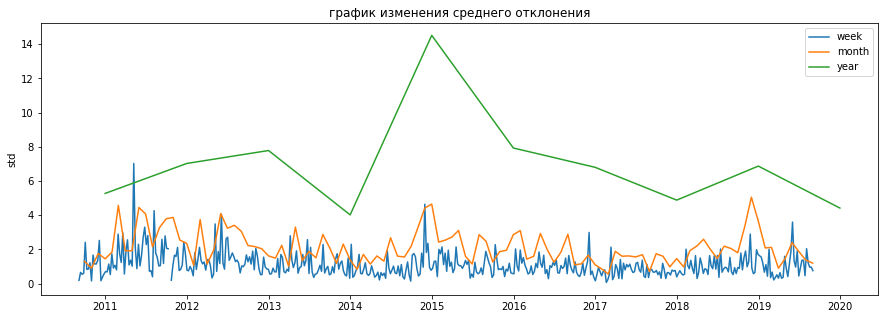

In [69]:
plt.figure(figsize=(15, 5))
plt.plot(brent_week_std, label='week')
plt.plot(brent_month_std, label='month')
plt.plot(brent_year_std, label='year')
plt.title('график изменения среднего отклонения')
plt.ylabel('std')
plt.legend()
plt.show()

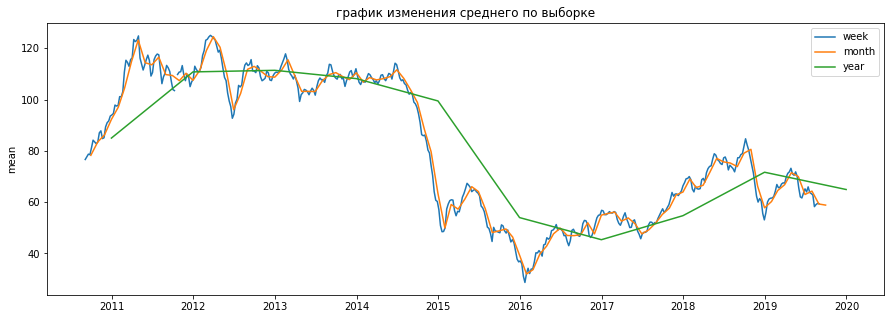

In [72]:
plt.figure(figsize=(15, 5))
plt.plot(brent_week_mean, label='week')
plt.plot(brent_month_mean, label='month')
plt.plot(brent_year_mean, label='year')
plt.title('график изменения среднего по выборке')
plt.ylabel('mean')
plt.legend()
plt.show()

### 5
Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

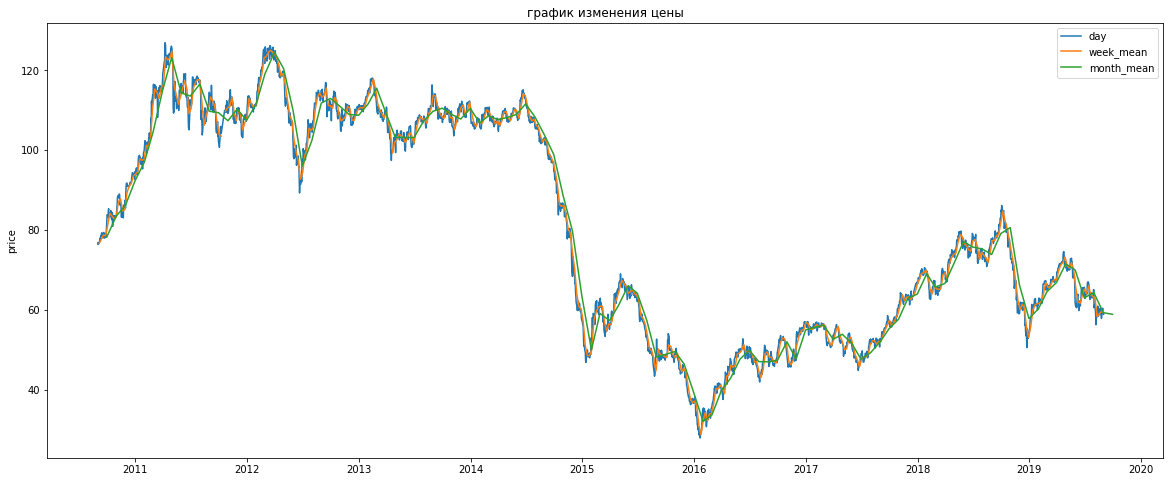

In [83]:
plt.figure(figsize=(20, 8))
plt.plot(brent_data, label='day')
plt.plot(brent_week_mean, label='week_mean')
plt.plot(brent_month_mean, label='month_mean')
plt.title('график изменения цены')
plt.ylabel('price')
plt.legend()
plt.show()

__Вывод__: 

    1) Поведение цены на недельном графике практически в точности повторяет поведение цены на дневном. 

    2) Поведение цены на месячном графике имеет немного большее отколнение от дневного, нежели недельный график. 